# Graded Challenge 2

_Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Classification terutama Logistic Regression dan SVM._


# 1 - Perkenalan

Nama    : Sri Wahyuni

Batch   : FTDS-016-RMT

### Dataset

Dataset yang digunakan pada project ini adalah dataset yang diperoleh dari `bigquery-public-data` dengan dataset `ml_datasets` dari database bernama `census_adult_income`. link [berikut](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=census_adult_income&page=table) untuk langsung menuju ke dataset.

Data yang digunakan berdasarkan kritearia sebagai berikut:
-  `age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, dan income_bracket`, 
- Kriteria semua `workclass` kecuali `?`,
- `hours_per_week` kurang dari 100,
- Limit jumlah data menjadi sebanyak nomor batch dikali dengan tahun lahir yaitu Batch 10 dan lahir tahun 1995, 16 x 1997 = 31952. Karena dataset dengan kriteria diatas tidak mencapai limit tersebut karena datasetnya terdiri dari 30725.

### Query Google Cloud Platform

**SELECT** 
age, 
workclass, 
education, 
education_num, 
marital_status, 
occupation, 
relationship, 
race, 
sex, 
capital_gain, 
capital_loss, 
hours_per_week, 
native_country,
income_bracket 

**FROM** `bigquery-public-data.ml_datasets.census_adult_income` 

**WHERE** workclass **NOT LIKE** '%?%' **AND** hours_per_week < 100

**LIMIT** 31952

### Problems

Buatlah model Classification menggunakan Logistic Regression dan SVM untuk memprediksi `income bracket` menggunakan dataset yang sudah disimpan.

### Objectives

_Graded Challenge 2_ ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# 2 - Import Libraries

Pada Project kali ini menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** dan **Scikit-learn**

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder #
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# 3 - Data Loading

Mengupload Dataset yang sudah diperoleh 

In [351]:
data = pd.read_csv(r'C:\Users\wSatrian\github-classroom\H8-Assignments-Bay\p1---ftds-016-rmt--g2-swhyuni\h8dsft_P1G2_Sri_Wahyuni.csv', skipinitialspace=True)

Mengecek lima Dataset teratas

In [352]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,33,?,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,21,United-States,<=50K


Mengecek Lima Dataset Terbawah

In [353]:
data.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
30720,50,Self-emp-inc,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,70,Germany,<=50K
30721,21,Private,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,70,United-States,<=50K
30722,32,Private,Some-college,10,Separated,Machine-op-inspct,Unmarried,Black,Female,0,0,70,United-States,<=50K
30723,39,Private,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0,0,70,United-States,<=50K
30724,20,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,70,United-States,<=50K


Menduplicate Dataset

In [354]:
data_duplicate = data.copy()

In [355]:
data.shape

(30725, 14)

Dataset ini terdiri dari 30725 baris dan 14 kolom

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       30725 non-null  object
 3   education_num   30725 non-null  int64 
 4   marital_status  30725 non-null  object
 5   occupation      30725 non-null  object
 6   relationship    30725 non-null  object
 7   race            30725 non-null  object
 8   sex             30725 non-null  object
 9   capital_gain    30725 non-null  int64 
 10  capital_loss    30725 non-null  int64 
 11  hours_per_week  30725 non-null  int64 
 12  native_country  30725 non-null  object
 13  income_bracket  30725 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


DataFrame ini terbetuk dari:
- 5 tipe data **interger** 
- 9 tipe data **object**

In [357]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30725.0,38.439512,13.119665,17.0,28.0,37.0,47.0,90.0
education_num,30725.0,10.129699,2.562702,1.0,9.0,10.0,13.0,16.0
capital_gain,30725.0,1105.785094,7497.027762,0.0,0.0,0.0,0.0,99999.0
capital_loss,30725.0,88.889959,405.613208,0.0,0.0,0.0,0.0,4356.0
hours_per_week,30725.0,40.946461,11.987385,1.0,40.0,40.0,45.0,99.0


Dari tabel diatas diperoleh beberapa informasi:
- Dilihat berdasarkan 'age' rentan usia pekerja berada di kategori **dewasa** yaitu 38 tahun
- Terdapat orang yang tidak memiliki capital_gain dan capital_loss
- Jam kerja perminggu cukup unik karena ada orang yang bekerja hanya 1 jam dalam 1 minggu, sedangkan jam paling banyak yaitu 99 jam perminggu (hal ini juga dapat dipengaruhi karena dibuat batasan untuk project hour_per_week kurang dari 100 jam)
- Distribusi data tampaknya ada skew dilihat pada kolom capital_gain dan capital_loss nilai mean lebih besar dari median 

# 4 - Exploratory Data Analysisi (EDA)

## Income Bracket (Target Column)

In [358]:
print(f'Number of unique values in Income Bracket: {data.income_bracket.nunique()}')
print(f'Uniqe values in Income Bracket: {data.income_bracket.unique()}')

Number of unique values in Income Bracket: 2
Uniqe values in Income Bracket: ['<=50K' '>50K']


Mari kita lihat visualnya dengan membuat function agar mempermudah analisa selanjutnya

In [359]:
# Membuat function visualisasi

def visual_data(df, variabel):
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[variabel])


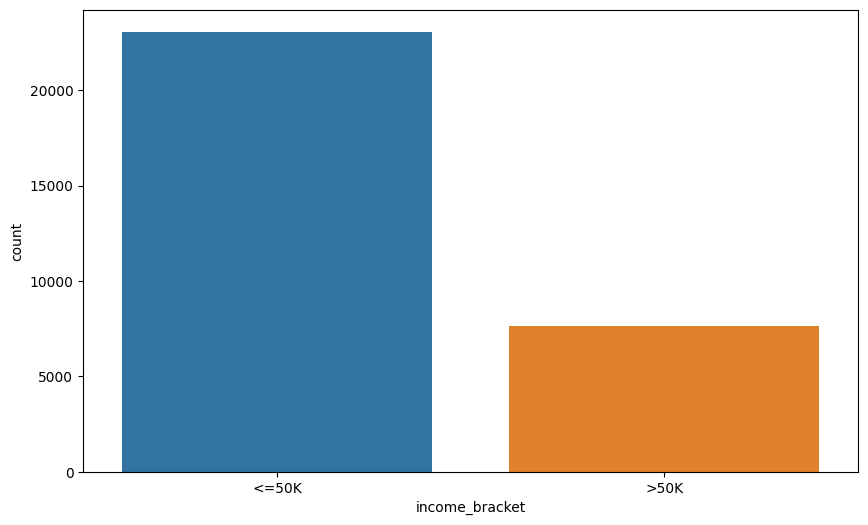

In [360]:
visual_data(data, 'income_bracket')

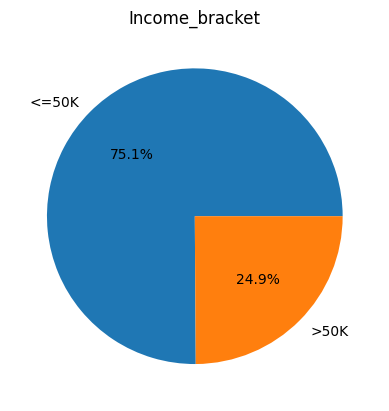

In [361]:
plt.pie(data.groupby('income_bracket').size(), labels=data.groupby('income_bracket').size().index, autopct='%1.1f%%')
plt.title('Income_bracket')
plt.show()

Pada kolom Income Bracket terdapat 2 nilai yaitu pendapatan kurang dari sama dengan 50000 (<=50k) dan lebih dari 50000 (>50k). bedasarkan hasil visualisai orang dengan penghasilan lebih dari 50000 sedikit. Data ini termasuk ke data **imbalance**.

### Age	

In [362]:
print(f'Number of unique values in Age: {data.age.nunique()}')
print(f'Uniqe values in Age: {data.age.unique()}')

Number of unique values in Age: 72
Uniqe values in Age: [18 37 39 29 64 31 53 56 28 52 23 59 50 61 47 66 63 26 54 62 38 32 41 33
 43 42 40 69 35 30 58 44 71 45 65 25 49 46 51 72 60 55 73 48 77 22 36 17
 19 20 27 24 21 57 90 68 67 34 76 70 75 84 74 78 79 81 85 82 83 80 88 86]


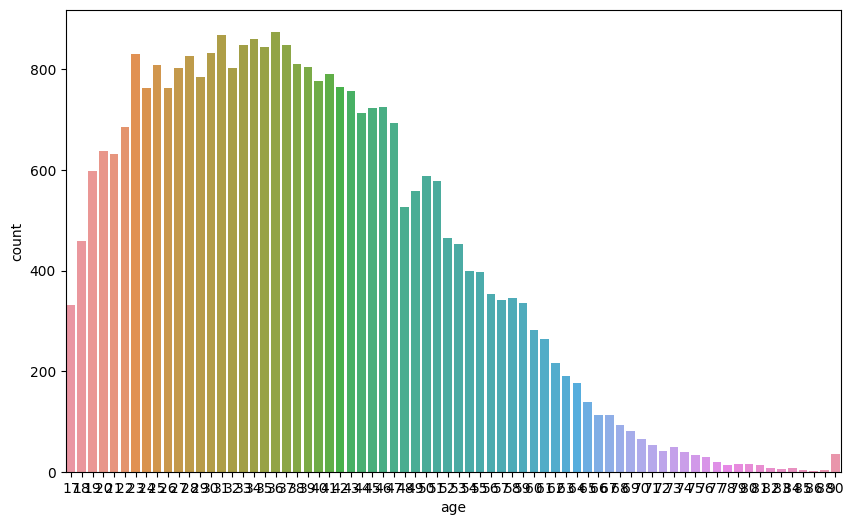

In [363]:
visual_data(data, 'age')

Pada kolom 'age' memiliki uniqe value yang banyak yaitu dari usia 17 tahun hingga 90 tahun, rata-rata usia terbanyak yaitu 38 tahun

In [364]:
# Membuat function untuk distribusi data

def histogram_plot(df, variabel):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(df[variabel], kde=True, bins=25)
    plt.title('Histogram')

# boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variabel])
    plt.title('Boxplot')
    plt.show()
    print('\nSkewness Value : ', df[variabel].skew())

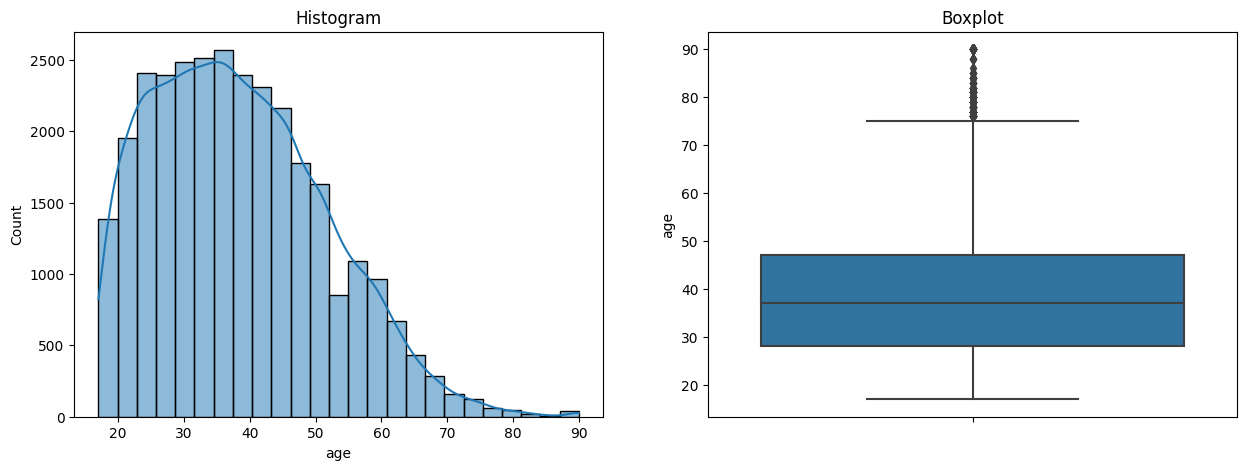


Skewness Value :  0.5316675402543493


In [365]:
histogram_plot(data, 'age')

Distribusi kolom 'age' adalah right skewness dengan nilai 0.53 yang artinya distribusi condong ke arah kanan yang mengakibatkan adanya outlier pada atas atau sisi kanan, karena Logostic Regrassion dan SVM sensitif dengan outlier akan kita handling outlier di **preprocessing** 

### Education and Education_num

In [366]:
pd.crosstab(data.education_num, data.education)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
education_num,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0
2,0,0,0,156,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,303,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,574,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,463,0,0,0,0,0,0,0,0,0
6,833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1057,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,393,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,9969,0,0,0,0


In [367]:
data.groupby(['education_num', 'education']).size()

education_num  education   
1              Preschool         46
2              1st-4th          156
3              5th-6th          303
4              7th-8th          574
5              9th              463
6              10th             833
7              11th            1057
8              12th             393
9              HS-grad         9969
10             Some-college    6777
11             Assoc-voc       1321
12             Assoc-acdm      1020
13             Bachelors       5182
14             Masters         1675
15             Prof-school      558
16             Doctorate        398
dtype: int64

Berdasarkan data diatas dapat disimpulkan bahwa education_num adalah hasil encoding dari education dalam arti lain education sudah dikelompokan berdasarkan tingkatannya dan direpresentatifkan dengan education_num, sehingga pada tahap preprocessing kolom **education** akan di **drop**

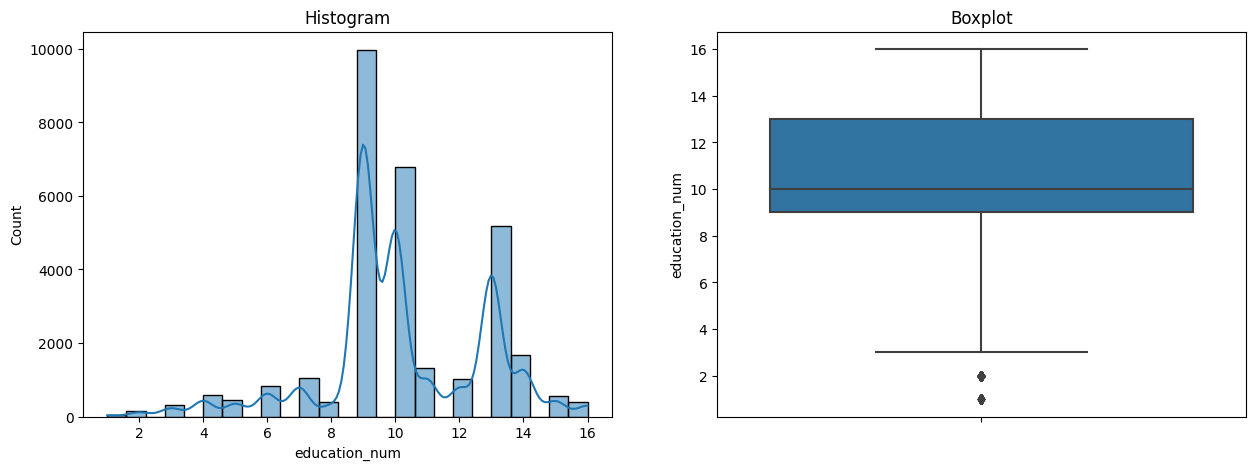


Skewness Value :  -0.31025823520678597


In [368]:
histogram_plot(data, 'education_num')

Education terbanyak didata ini adalah HS-grad. 

Distribusi pada kolom 'education' cenderung normal dilihat dari nilai skewnessnya yaitu -0.31.
Terdapat outlier pada sisi kiri atau bawah, akan di handle pada proses **preprocessing** 

### Capital gain

In [369]:
print(f'Number of unique values in capital_gain: {data.capital_gain.nunique()}')
print(f'Uniqe values in capital_gain: {data.capital_gain.unique()}')

Number of unique values in capital_gain: 118
Uniqe values in capital_gain: [    0 15024 99999  3137  1455  5556  7298  2885  1055   594   991  2202
 13550 10520  2414  3103  7688  3908  3818  3325  8614  2174  6497  2964
  1424  5013  5178  9386  4934 15831 27828  4650  4386  4787  3411  2635
  3464  1173  4931 20051  2597 14344 25236 14084 18481  2907  2354  2936
  1409  2407  6849  4416  1797  6418  3942  4508  2829  3456  2062  6514
 34095  4064  2176  2228  2290  1848 10605  2329  2346  2580  3781  3674
  3273  2653   114  6360  2036  3471  1639  3432  2050  6767   401 41310
  6723  3418  5060  1151  4865  5455  1831  1471  3887  7443  2977  4687
  4101  7978  2463  1506 10566  2961  7430  2105   914  5721  2009  2993
  7896  9562 15020  6097 22040  2387  2538 11678 25124  1086]


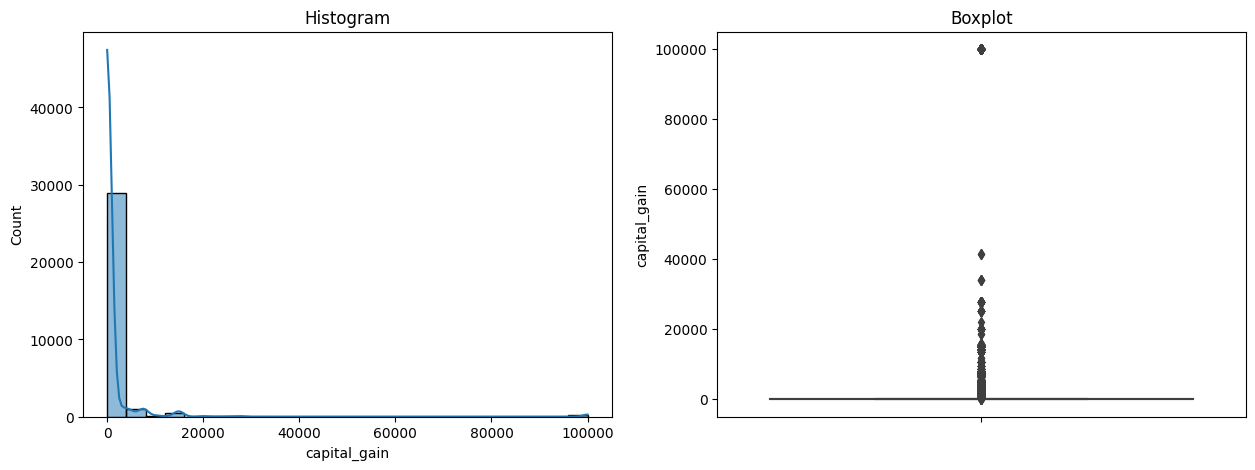


Skewness Value :  11.787236833566169


In [370]:
histogram_plot(data, 'capital_gain')

Hampir semua orang tidak memiliki capital_gain, hanya sebagian kecil yang memiliki hal ini menjadikan data sangat banyak outlier. Karena model regresi dan svm sensitif terhadap outlier sehingga saya memutuskan untuk **tidak menggunakan** data ini karena akan sangat mempengaruhi model

### Capital Loss

In [371]:
print(f'Number of unique values in capital_gain: {data.capital_gain.nunique()}')
print(f'Uniqe values in capital_gain: {data.capital_gain.unique()}')

Number of unique values in capital_gain: 118
Uniqe values in capital_gain: [    0 15024 99999  3137  1455  5556  7298  2885  1055   594   991  2202
 13550 10520  2414  3103  7688  3908  3818  3325  8614  2174  6497  2964
  1424  5013  5178  9386  4934 15831 27828  4650  4386  4787  3411  2635
  3464  1173  4931 20051  2597 14344 25236 14084 18481  2907  2354  2936
  1409  2407  6849  4416  1797  6418  3942  4508  2829  3456  2062  6514
 34095  4064  2176  2228  2290  1848 10605  2329  2346  2580  3781  3674
  3273  2653   114  6360  2036  3471  1639  3432  2050  6767   401 41310
  6723  3418  5060  1151  4865  5455  1831  1471  3887  7443  2977  4687
  4101  7978  2463  1506 10566  2961  7430  2105   914  5721  2009  2993
  7896  9562 15020  6097 22040  2387  2538 11678 25124  1086]


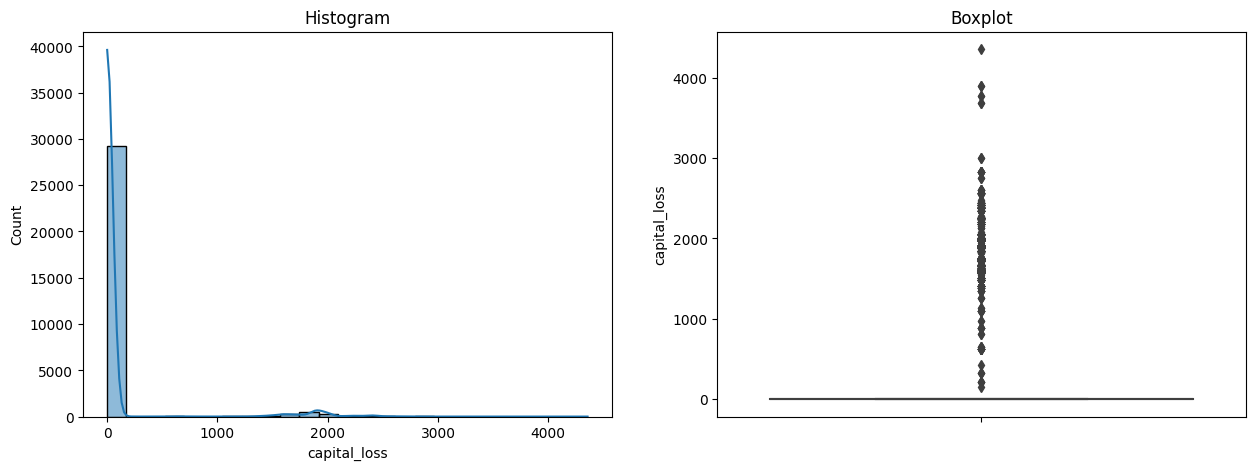


Skewness Value :  4.5149166709154676


In [372]:
histogram_plot(data, 'capital_loss')

Sama seperti capital gain, banyak orang yang tidak memiliki capital_loss sehingga mengakibatkan banyaknya outlier dan data tidak normal distribusinya maka saya **tidak menggunakan** data ini.

### Hour Per Week

In [373]:
print(f'Number of unique values in capital_gain: {data.capital_gain.nunique()}')
print(f'Uniqe values in capital_gain: {data.capital_gain.unique()}')

Number of unique values in capital_gain: 118
Uniqe values in capital_gain: [    0 15024 99999  3137  1455  5556  7298  2885  1055   594   991  2202
 13550 10520  2414  3103  7688  3908  3818  3325  8614  2174  6497  2964
  1424  5013  5178  9386  4934 15831 27828  4650  4386  4787  3411  2635
  3464  1173  4931 20051  2597 14344 25236 14084 18481  2907  2354  2936
  1409  2407  6849  4416  1797  6418  3942  4508  2829  3456  2062  6514
 34095  4064  2176  2228  2290  1848 10605  2329  2346  2580  3781  3674
  3273  2653   114  6360  2036  3471  1639  3432  2050  6767   401 41310
  6723  3418  5060  1151  4865  5455  1831  1471  3887  7443  2977  4687
  4101  7978  2463  1506 10566  2961  7430  2105   914  5721  2009  2993
  7896  9562 15020  6097 22040  2387  2538 11678 25124  1086]


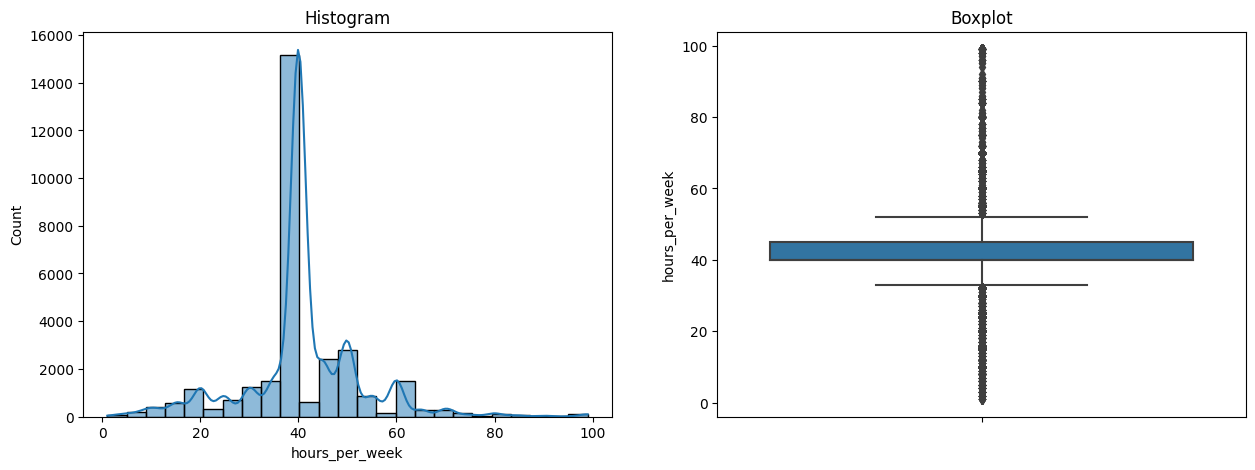


Skewness Value :  0.3307490496608131


In [374]:
histogram_plot(data, 'hours_per_week')

<AxesSubplot: xlabel='hours_per_week', ylabel='count'>

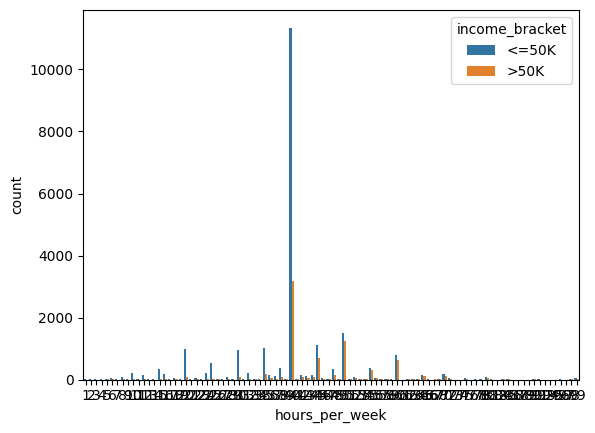

In [375]:
sns.countplot(x='hours_per_week', hue='income_bracket', data=data)

Dilihat pada data diatas hours_per_week tidak memiliki korelasi terhadap income_bracket karena semakin banyak jam kerja setiap minggunya tidak membuat semakin tinggi penghasilan. Data tidak normal dan memiliki banyak outlier.

### Workclass

In [376]:
data.workclass.unique()

array(['Never-worked', 'Private', 'Self-emp-not-inc', 'Self-emp-inc',
       'State-gov', 'Federal-gov', 'Local-gov', 'Without-pay'],
      dtype=object)

<AxesSubplot: xlabel='count', ylabel='workclass'>

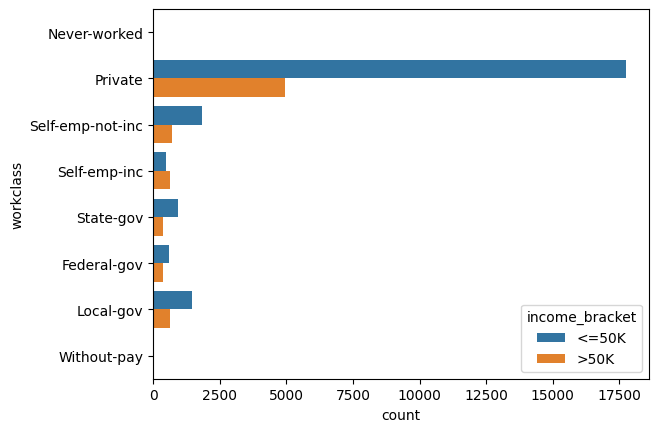

In [377]:
sns.countplot(y='workclass', hue='income_bracket', data=data)

Workclass terbanyak yaitu private dan penghasil lebih dari 50.000 berada di kelas privat

### Occupation

In [378]:
data.occupation.unique()

array(['?', 'Sales', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Tech-support', 'Other-service', 'Prof-specialty',
       'Exec-managerial', 'Farming-fishing', 'Priv-house-serv',
       'Protective-serv', 'Transport-moving', 'Handlers-cleaners',
       'Machine-op-inspct'], dtype=object)

<AxesSubplot: xlabel='count', ylabel='occupation'>

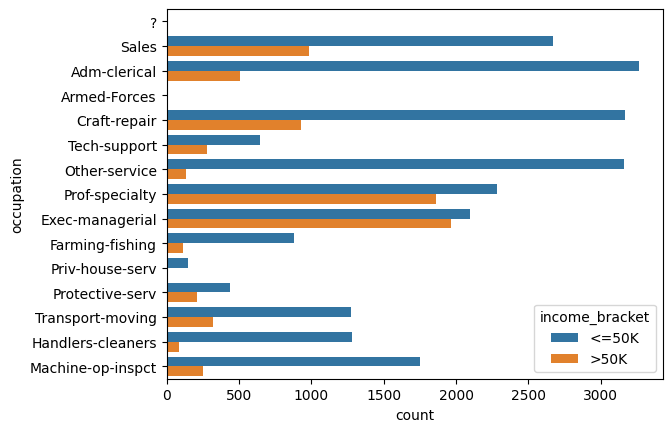

In [379]:
sns.countplot(y='occupation', hue='income_bracket', data=data)

Pada occupation pekerjaan paling banyak adalah craft-repair dan other service namun hal ini tidak menjadi jenis pekerjaan yang paling banyak menghasilkan penghasilan lebih dari 50K

### Sex

<AxesSubplot: xlabel='count', ylabel='sex'>

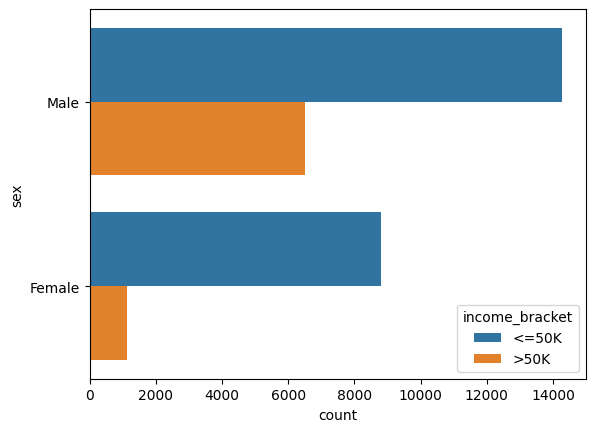

In [380]:
sns.countplot(y='sex', hue='income_bracket', data=data)

Penghasilan lebih dari 50K paling banyak diperoleh laki-laki

# 5 - Data Preprocessing

## Get Data for Model Inference

Dikarenakan memiliki keterbatasan data sehingga kita akan memisahkan model inference yang nantinya akan digunakan untuk test model

In [381]:
data_inf = data.sample(10, random_state=15)
data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
8779,25,Private,Assoc-acdm,12,Never-married,Sales,Own-child,White,Female,0,0,40,Peru,<=50K
11007,43,Private,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
19616,59,Local-gov,HS-grad,9,Separated,Protective-serv,Unmarried,Black,Female,0,0,40,United-States,<=50K
5883,61,Private,11th,7,Widowed,Handlers-cleaners,Not-in-family,White,Female,0,0,30,United-States,<=50K
25147,36,Private,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,48,United-States,<=50K
24533,47,Private,HS-grad,9,Widowed,Priv-house-serv,Not-in-family,Asian-Pac-Islander,Female,0,0,45,Thailand,<=50K
28451,29,Private,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,55,United-States,<=50K
785,23,State-gov,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,22,United-States,<=50K
20876,21,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
9784,45,Local-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K


seteleha mendapatkan data inference langkah selanjutnya kita akan merevo data inference

In [382]:
data_train_test = data.drop(data_inf.index)

Kita sudah berhasil meremove data inference dari data sehingga jumlah bari sebelumnya adalah 30725 menjadi 30715 baris

selanjutnya kita akan mereset index untuk meminimalisir hal-hal yang tidak diinginkan dikemudian hari

In [383]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Split Data

Membuat training set dan test set dengan perbandingan 8:2, dimana:
- 80% data menjadi **training set**
- 20% data menjadi **test set**

In [384]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=15)
df_train

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
22959,54,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,44,United-States,>50K
16087,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
4418,19,Private,Some-college,10,Never-married,Sales,Own-child,Amer-Indian-Eskimo,Female,0,1721,25,United-States,<=50K
18738,45,Local-gov,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
23760,40,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,33,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
2693,20,Private,Some-college,10,Never-married,Tech-support,Own-child,White,Male,0,0,15,United-States,<=50K
8076,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,7688,0,40,United-States,>50K
20213,23,Private,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K


In [385]:
df_test.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
8779,25,Private,Assoc-acdm,12,Never-married,Sales,Own-child,White,Female,0,0,40,Peru,<=50K
11007,43,Private,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
19616,59,Local-gov,HS-grad,9,Separated,Protective-serv,Unmarried,Black,Female,0,0,40,United-States,<=50K
5883,61,Private,11th,7,Widowed,Handlers-cleaners,Not-in-family,White,Female,0,0,30,United-States,<=50K
25147,36,Private,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,48,United-States,<=50K


## Handling Outlier

### Age

Pada saat EDA 'Age' terdeteksi skewed variabel sehingga akan di handling dengan metode **IQR**

In [386]:
IQR = df_train.age.quantile(0.75) - df_train.age.quantile(0.25)

lower_boundary = df_train.age.quantile(0.25) - (IQR*1.5)
upper_boundary = df_train.age.quantile(0.75) + (IQR*1.5)

lower_boundary, upper_boundary

(-0.5, 75.5)

In [387]:
print('Total age : {}'.format(len(df_train)))
print('Age lebih dari 75.5 : {}'.format(len(df_train[df_train['age'] > upper_boundary])))
print('% Age lebih besar dari 75.5: {}'.format(len(df_train[df_train['age'] > upper_boundary]) / len(df_train)*100))

Total age : 24580
Age lebih dari 75.5 : 142
% Age lebih besar dari 75.5: 0.5777054515866558


Batas atas outlier 75.5 dan batas bawah - 0.5. feature age tidak ada nilai negatif maka saya menghitung outlir hanya menggunakan batas atas ini sesuai dengan boxplot yang sudah dibuat yaitu hanya ada disisi atas / kanan. Karena persentase outlier yang kecil maka outlier akan di trim / menghilangkan

In [388]:
df_train = df_train[(df_train.age > lower_boundary) & (df_train.age < upper_boundary)]

Setelah menghilangkan outlier mari kita lihat visual setelah trimming

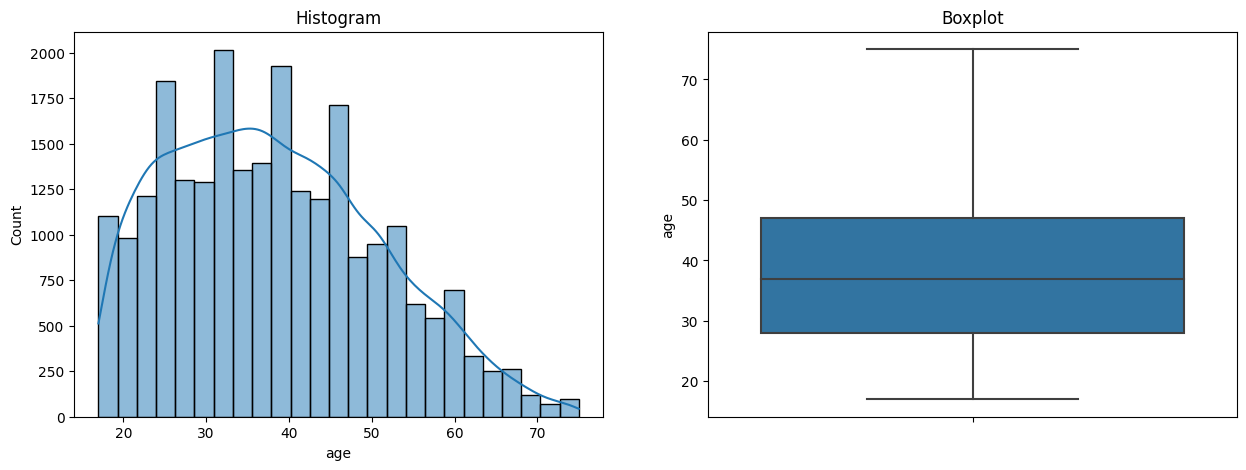


Skewness Value :  0.4076650073058023


In [389]:
histogram_plot(df_train, 'age')

In [390]:
df_train.shape

(24438, 14)

Setelah dilakukan penghilangan outlier jumlah baris dari data df_train menjadi 24438

### Education Num

Pada saat EDA 'Education_num' memilik distribusi normal maka akan kita handle outlier dengan metode **STD**

In [391]:
lower_boundary_edu = df_train.education_num.mean() - 3*df_train.education_num.std()
upper_boundary_edu = df_train.education_num.mean() + 3*df_train.education_num.std()

lower_boundary_edu, upper_boundary_edu


(2.4744770569414545, 17.817527198725948)

In [392]:
print('Total number of education_num: {}'.format(len(df_train)))
print('Education_num with more than 17.8 (right end outliers) : {}'.format(len(df_train[df_train['education_num'] > upper_boundary_edu])))
print('Education_num with less than 2.4 (left end outliers.  : {}'.format(len(df_train[df_train['education_num'] < lower_boundary_edu])))
print('')
print('% right end outliers : {}'.format(len(df_train[df_train['education_num'] > upper_boundary_edu]) / len(df_train) * 100))
print('% left end outliers  : {}'.format(len(df_train[df_train['education_num'] < lower_boundary_edu]) / len(df_train) * 100))

Total number of education_num: 24438
Education_num with more than 17.8 (right end outliers) : 0
Education_num with less than 2.4 (left end outliers.  : 164

% right end outliers : 0.0
% left end outliers  : 0.6710860135853998


Batas bawah dan atas outlier adalah 2 dan 17, kita memiliki 164 outlier dibatas bawah atau setara 0.67% dan tidak memiliki outlier atas hal ini sesuai dengan boxplot yang sudah dibuat. kita akan trimming data ini 

In [393]:
df_train = df_train[(df_train.education_num > lower_boundary_edu) & (df_train.education_num < upper_boundary_edu)]

Data sudah di trimming kita lihat visualnya

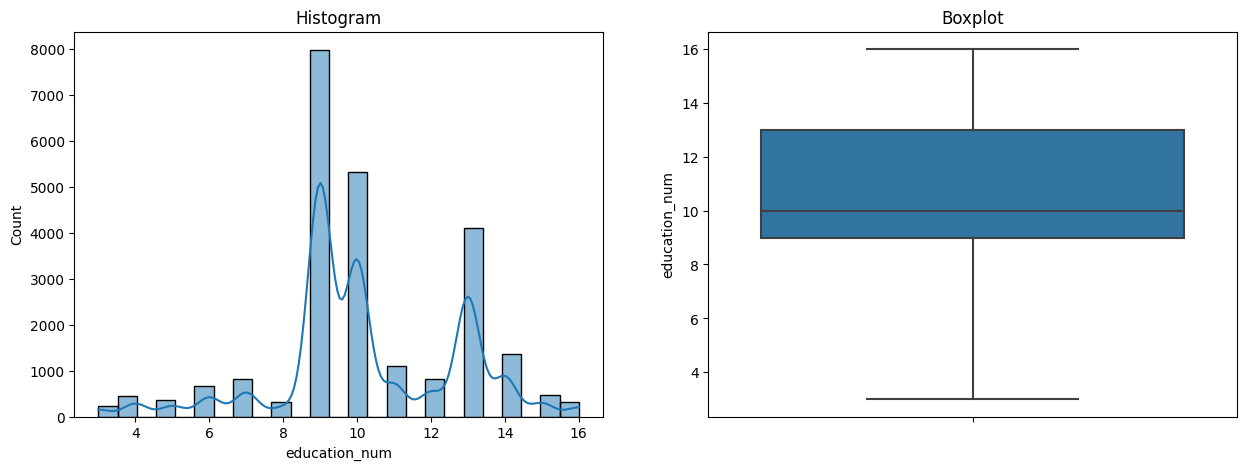


Skewness Value :  -0.14758497158734932


In [394]:
histogram_plot(df_train, 'education_num')

Conclusion:

- Terdapat 5 data yang memiliki outlier yaitu feature age, education_num, capital_gain, capital_loss dan hours_per_week
- Handling outlier hanya untuk feature age dan education_num
- Capital_gain, Capital_Loss dan Hours_per_week tidak di handle karena memiliki banyak outlier yang apabila kita remove kita akan kehilangan banyak data dan jika kita ganti mean dan median akan sangat mempengaruhi nilai data tersebut

## Handling Missing Value

In [395]:
df_train.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [396]:
df_test.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

Tidak ada missing value

### Split between Numerical Columns and Categorical Columns

Sebelum memisahkan kolom Numeric dan Categoric saya akan memisahkan antara X dan y

In [432]:
df_train['income_bracket'] = df_train['income_bracket'].map({'>50K': 1, '<=50K': 0})
df_test['income_bracket'] = df_test['income_bracket'].map({'>50K': 1, '<=50K': 0})

In [433]:
X_train = df_train.drop(['income_bracket'], axis=1)
y_train = df_train['income_bracket']

X_test = df_test.drop(['income_bracket'], axis=1)
y_test = df_test['income_bracket']

### Feature Selection

In [434]:
encoder = OrdinalEncoder()
encoder.fit(X_train)

# transform data X-train dan X-test
X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded

array([[37.,  3., 13., ...,  0., 43., 39.],
       [11.,  3.,  8., ...,  0., 39., 39.],
       [ 2.,  3., 13., ..., 34., 24., 39.],
       ...,
       [19.,  5., 10., ...,  0., 39., 39.],
       [ 6.,  3., 10., ...,  0., 39., 39.],
       [38.,  3., 10., ...,  0., 37., 39.]])

In [435]:
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X_train_encoded, y_train)
fit.scores_

array([1.20190205e+04, 2.46879235e-01, 1.64608549e+02, 2.35907095e+03,
       7.77807018e+02, 1.38748218e+02, 2.79625498e+03, 2.10343278e+01,
       3.73656423e+02, 2.29108503e+05, 3.28386555e+04, 4.40659158e+03,
       3.70685445e+00])

In [436]:
np.round_(fit.scores_)

array([1.20190e+04, 0.00000e+00, 1.65000e+02, 2.35900e+03, 7.78000e+02,
       1.39000e+02, 2.79600e+03, 2.10000e+01, 3.74000e+02, 2.29109e+05,
       3.28390e+04, 4.40700e+03, 4.00000e+00])

In [437]:
chi = pd.Series(fit.scores_)
chi.index = X.columns
chi.sort_values(ascending=False)

capital_gain      229108.502567
capital_loss       32838.655535
age                12019.020501
hours_per_week      4406.591576
relationship        2796.254981
education_num       2359.070949
marital_status       777.807018
sex                  373.656423
education            164.608549
occupation           138.748218
race                  21.034328
native_country         3.706854
workclass              0.246879
dtype: float64

Pada Feature selection dengan metode chi square diperoleh variabel tertinggi yaitu capital_gain','capital_loss','age','hours_per_week','relationship','education' ini aka dijadika feature

In [438]:
select_feature = ['capital_gain','capital_loss','age','hours_per_week','relationship','education']

In [439]:
X_train = X_train[select_feature]
X_test = X_test[select_feature]

Memisahkan data categorical dan numerical

In [440]:
num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

Number of numerical columns: 4
Numerical columns: Index(['capital_gain', 'capital_loss', 'age', 'hours_per_week'], dtype='object')
Number of categorical columns: 2
Categorical columns: Index(['relationship', 'education'], dtype='object')


### Feature Scalling

Akan dilakukan scaling terhadap semua feature numerical Menggunakan **minmaxscaler**

In [441]:
scaler= MinMaxScaler()
scaler.fit(X_train_num)

#Transform X_train dan X_test
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

Semua data numerical sudah berhasil di scalling

### Feature  Encoding

Akan dilakukan encoding terhadap semua feature categorical Menggunakan **OrdinalEncoder**

In [442]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

# transform data X-train dan X-test
X_train_cat_encoded2 = encoder.fit_transform(X_train_cat)
X_test_cat_encoded2 = encoder.fit_transform(X_test_cat)
X_train_cat_encoded2

array([[ 0., 13.],
       [ 0.,  8.],
       [ 3., 13.],
       ...,
       [ 5., 10.],
       [ 3., 10.],
       [ 1., 10.]])

Semua data categorical sudah berhasil di Encoding

Menggabungkan kolom X_train_final dengan X_test_final

In [443]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded2], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded2], axis=1)
X_train_final

array([[ 0.        ,  0.        ,  0.63793103,  0.43877551,  0.        ,
        13.        ],
       [ 0.        ,  0.        ,  0.18965517,  0.39795918,  0.        ,
         8.        ],
       [ 0.        ,  0.44128205,  0.03448276,  0.24489796,  3.        ,
        13.        ],
       ...,
       [ 0.07688077,  0.        ,  0.32758621,  0.39795918,  5.        ,
        10.        ],
       [ 0.        ,  0.        ,  0.10344828,  0.39795918,  3.        ,
        10.        ],
       [ 0.        ,  0.        ,  0.65517241,  0.37755102,  1.        ,
        10.        ]])

In [444]:
# k = 6 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test2 = SelectKBest(score_func=chi2, k=4)
fit2 = test.fit(X_train_final, y_train)
fit.scores_

array([ 625.29925438,  278.82475411,  207.2244914 ,   45.37594918,
       2796.25498129,  164.60854881])

In [445]:
np.round_(fit.scores_)

array([ 625.,  279.,  207.,   45., 2796.,  165.])

Mengubah data menjadi DataFrame

In [446]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[select_feature])
X_test_final_df = pd.DataFrame(X_test_final, columns=[select_feature])

# 6 - Model Definition

Model yang akan digunakan:
- logicR adalah model **Logistic Regression**
- svc adalah model **Linear Support Vector Classifer**

In [448]:
logicR = LogisticRegression()
svc = LinearSVC(random_state=25, max_iter=1000, penalty='l1', dual=False)

# 7 - Model Training

In [449]:
%timeit logicR.fit(X_train_final, y_train)

92.4 ms ± 6.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [450]:
%timeit svc.fit(X_train_final, y_train)

161 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Model SVM lebih lama dibandingkan dengan Logistic Regression

# 8 - Model Evaluation

### Logistic Original Data

In [451]:
print(classification_report(y_train, logicR.predict(X_train_final)))
print('----Test Set----')
print(classification_report(y_test, logicR.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88     18177
           1       0.72      0.30      0.43      6097

    accuracy                           0.80     24274
   macro avg       0.76      0.63      0.65     24274
weighted avg       0.78      0.80      0.76     24274

----Test Set----
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4623
           1       0.69      0.31      0.43      1522

    accuracy                           0.79      6145
   macro avg       0.75      0.63      0.65      6145
weighted avg       0.78      0.79      0.76      6145



### Support Vector Classifier

In [452]:
print('----Training Set----')
print(classification_report(y_train, svc.predict(X_train_final)))
print('----Test Set----')
print(classification_report(y_test, svc.predict(X_test_final)))

----Training Set----
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     18177
           1       0.74      0.30      0.42      6097

    accuracy                           0.80     24274
   macro avg       0.77      0.63      0.65     24274
weighted avg       0.79      0.80      0.76     24274

----Validation Set----
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      4623
           1       0.72      0.29      0.41      1522

    accuracy                           0.80      6145
   macro avg       0.76      0.63      0.64      6145
weighted avg       0.78      0.80      0.76      6145



### Model Analysis

Hasil akurasi Logistic Regression dan Support Vector Classifier cukup bagus dan tidak memiliki perbedaan yang signifikan yaitu 0.80 namun pada test set Linear Regressi berbeda 0.01 lebih kecil. Jika dilihat dari recall dan f1-score nilainya kecil hal ini karenakan data **imbalance**

# 9 - Model Inference (Testing)

Setelah model dilatih dan evaluasi, pada bagian ini model akan diuji dengan data inference yang sudah disiapkan diawal

In [453]:
data_inf.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,25,Private,Assoc-acdm,12,Never-married,Sales,Own-child,White,Female,0,0,40,Peru,<=50K
1,43,Private,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,59,Local-gov,HS-grad,9,Separated,Protective-serv,Unmarried,Black,Female,0,0,40,United-States,<=50K
3,61,Private,11th,7,Widowed,Handlers-cleaners,Not-in-family,White,Female,0,0,30,United-States,<=50K
4,36,Private,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,48,United-States,<=50K


Inference Preprocessing

Memisahkan data feature dan target

In [479]:
X_data_inf = data_inf[select_feature]
y_data_inf = data_inf['income_bracket'].map({'<=50K': 0, '>50K': 1})

Memisahkan kolom numerical dan categorical

In [480]:
num_cols_inf = X_data_inf.select_dtypes(include=np.number).columns
cat_cols_inf = X_data_inf.select_dtypes(include=['object']).columns
data_num_inf = data_inf[num_cols_inf]
data_cat_inf = data_inf[cat_cols_inf]

Scalling dan Encoding Feature

In [482]:
model_scaler = MinMaxScaler()
model_scaler.fit(data_num_inf)
model_encoder = OrdinalEncoder()
model_encoder.fit(data_cat_inf)

data_scal_inf = model_scaler.transform(data_num_inf)
data_encod_inf = model_encoder.transform(data_cat_inf)

Menggabungkan data numerik dan kategorik

In [484]:
data_inf_final = np.concatenate([data_scal_inf, data_encod_inf], axis=1)
data_inf_final

array([[0.        , 0.        , 0.1       , 0.54545455, 2.        ,
        1.        ],
       [0.        , 0.        , 0.55      , 0.54545455, 1.        ,
        2.        ],
       [0.        , 0.        , 0.95      , 0.54545455, 3.        ,
        3.        ],
       [0.        , 0.        , 1.        , 0.24242424, 1.        ,
        0.        ],
       [0.        , 0.        , 0.375     , 0.78787879, 1.        ,
        1.        ],
       [0.        , 0.        , 0.65      , 0.6969697 , 1.        ,
        3.        ],
       [0.        , 0.        , 0.2       , 1.        , 1.        ,
        4.        ],
       [0.        , 0.        , 0.05      , 0.        , 1.        ,
        2.        ],
       [0.        , 0.        , 0.        , 0.54545455, 2.        ,
        3.        ],
       [0.        , 0.        , 0.6       , 0.54545455, 0.        ,
        5.        ]])

In [485]:
# Membuat DataFrame data_inf_final

X_data_inf_final = pd.DataFrame(data_inf_final, columns=[data_num_inf + data_cat_inf])
X_data_inf_final

,age,capital_gain,capital_loss,education,hours_per_week,relationship
0,0.0,0.0,0.100,0.545455,2.0,1.0
1,0.0,0.0,0.550,0.545455,1.0,2.0
2,0.0,0.0,0.950,0.545455,3.0,3.0
3,0.0,0.0,1.000,0.242424,1.0,0.0
4,0.0,0.0,0.375,0.787879,1.0,1.0
5,0.0,0.0,0.650,0.696970,1.0,3.0
6,0.0,0.0,0.200,1.000000,1.0,4.0
7,0.0,0.0,0.050,0.000000,1.0,2.0
8,0.0,0.0,0.000,0.545455,2.0,3.0
9,0.0,0.0,0.600,0.545455,0.0,5.0


### Inference Prediction

Data Inference sudah di preprocessing, saatnya kita prediksi pada setiap model

In [486]:
y_pred_logicR = logicR.predict(X_data_inf_final)
y_pred_svc = svc.predict(X_data_inf_final)

In [487]:
y_pred_logicR = pd.DataFrame(y_pred_logicR, columns=['LR'])
y_pred_svc = pd.DataFrame(y_pred_svc, columns=['SVC'])

In [491]:
predictions = pd.concat([y_pred_logicR, y_pred_svc], axis=1)
predictions['Actual'] = y_data_inf
predictions

,LR,SVC,Actual
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,1


In [492]:
print('----Logistic Regression----')
print(classification_report(y_data_inf, predictions['LR']))
print('----Support Vector Machine----')
print(classification_report(y_data_inf, predictions['SVC']))

----Logistic Regression----
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10

----Support Vector Machine----
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



### Model Analysis

Dari hasil prediksi menggunakan data inference akurasinya sangat tinggi namu model gagal memprediksi income_bracket >50K 

### Get Intercept and Slope

In [494]:
print('Intercept : ', logicR.intercept_)
print('Slope     : ', logicR.coef_)

Intercept :  [-3.89464012]
Slope     :  [[18.90360693  2.76284649  2.19300611  3.39151378 -0.29834824  0.06278132]]


In [497]:
X_train_final_df.columns

MultiIndex([(  'capital_gain',),
            (  'capital_loss',),
            (           'age',),
            ('hours_per_week',),
            (  'relationship',),
            (     'education',)],
           )

### Conclusion

- Pada project kali ini dataset yang digunakan adalah data penghasilan dengan kategori kurang dari 50K dan lebig dari 50K. Jenis pekerjaan dengan gaji diatas > 50 terbanyak adalah Exec-managerial dan farming-fishing, diperoleh juga rata rata usia aktif bekerja diantara 38 tahun.
- Kolom yang digunakan untuk model adalah 'capital_gain','capital_loss','age','hours_per_week','relationship','education' dengan menggunakan Logistic regression dan Support Vector Classifier 
- Hasil model Logistic Regression dan SVC berhasil mendapatkan akurasi yang cukup tinggi yaitu 0.80 namun recall dan f1 terhdap 1= >50K nilainya sangat kecil hal ini karena data imbalace. setelah diuji dengan data inference hasil akurasi semakin tinggi yaitu 0.90 namun recall dan f1 semakin turun hal ini karena model gagal memprediksi nilai 1
- Jadi model dengan performa paling baik diantara 2 model tersebut yaitu support vector classifier karena akurasi antara train dan test tidak berbeda nilai recall lebih besar dibanding Logictic Regression walaupun jika dilihat dari kecepatan pemprosesan lebih unggul Logictic Regresion

**NOTE**: improvment: Karena model data imbalance mungkin bisa menambahkan resapling untuk pengujian, menggunakan parameter lain dan

# Conceptual Problems
Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan coeficient pada logistic regression?
> suatu Feature koefisien terhadap x artinya yang mempengaruhi nilai x
2. Apakah yang dimaksud dengan Support Vector pada SVM?
> Suppory Vector pada SVM adalah data yang paling mendekati hyperplane (pemisahnya /persamaan garis)
3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!
> Fungsi kernel yaitu untuk menentukan proses pemetaan data non-linear berdimensi rendah dan mengubahnya ke dalam ruang dimensi yang lebih tinggi. Tujuannya untuk memudahkan pengklasifikasian data dengan menemukan hyperplane yang dapat memisahkan dataset secara linear dengan baik.
Salah satu kernel yang saya pahami adalah 'rbf'. 'rbf' akan memetakan feature ke ruang infinit dia akan mencari yang paling bagus, kurang lebih akan membentuk garis tidak linear (meliuk-liuk) ketajaman liuknya dipengaruhi oleh C dan Gamma yang akan di set.